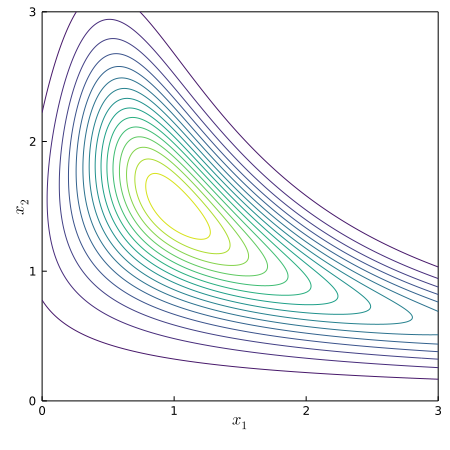

In [16]:
using Plots, LaTeXStrings, Printf, LinearAlgebra, Dates
gr() #pyplot()

fx(x1,x2) = -exp(-(x1*x2 - 1.5)^2 -(x2-1.5)^2)

x1 = 0:0.01:3
x2 = 0:0.01:3

pl1 = contour(x1, x2, fx, framestyle = :box, 
    c = cgrad(:viridis, rev = true), ylab = L"x_2", xlab = L"x_1",
    xlims = (0,3), ylims = (0,3), legend = false, grid = false,
    contour_labels = false, bins = 150, label = false, size = (450,450))

In [17]:
function generalized_pattern_search(f, x, α, D, ϵ, γ=0.5)
    y, n = f(x), length(x)
    
    while α > ϵ
        improved = false
    
        for (i,d) in enumerate(D)
            x′ = x + α*d
            push!(points, (x′))
            y′ = f(x′)

            if y′ < y
                x, y, improved = x′, y′, true
            end
        end

        if !improved
            α *= γ
        end
    end
    return x
end

generalized_pattern_search (generic function with 2 methods)

In [18]:
f = x -> -exp(-(x[1]*x[2] - 1.5)^2 -(x[2]-1.5)^2)

x0 = [0.75, 0.75]
points = []
push!(points, (x0))

D = [[0,1], [1,0], [0,-1], [-1,0]]

x_opt = generalized_pattern_search(f, x0, 0.2, D, 0.0001, 0.5)

2-element Array{Float64,1}:
 1.0001953124999998
 1.4998046875

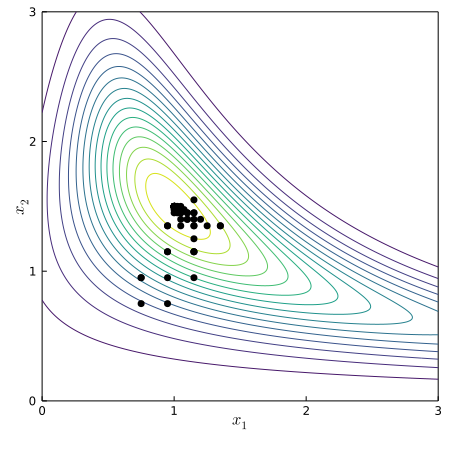

In [19]:
pl1 = contour(x1, x2, fx, framestyle = :box, 
    c = cgrad(:viridis, rev = true), ylab = L"x_2", xlab = L"x_1",
    xlims = (0,3), ylims = (0,3), legend = false, grid = false,
    contour_labels = false, bins = 150, label = false, size = (450,450))
plot!([P[1] for P in points], [P[2] for P in points], lw = -1, marker = :circle, markercolor = :black)

In [31]:
savefig(pl1, "7.5 GPS.svg")

In [20]:
points

97-element Array{Any,1}:
 [0.75, 0.75]
 [0.75, 0.95]
 [0.95, 0.95]
 [0.95, 0.75]
 [0.75, 0.95]
 [0.95, 1.15]
 [1.15, 1.15]
 [1.15, 0.95]
 [0.95, 1.15]
 [1.15, 1.3499999999999999]
 [1.3499999999999999, 1.3499999999999999]
 [1.15, 1.15]
 [0.95, 1.3499999999999999]
 ⋮
 [1.0003906249999999, 1.5]
 [1.00078125, 1.499609375]
 [1.0003906249999999, 1.4992187499999998]
 [0.9999999999999999, 1.499609375]
 [1.0003906249999999, 1.4998046875]
 [1.0005859375, 1.4998046875]
 [1.0003906249999999, 1.499609375]
 [1.0001953124999998, 1.4998046875]
 [1.0001953124999998, 1.5]
 [1.0003906249999999, 1.4998046875]
 [1.0001953124999998, 1.499609375]
 [0.9999999999999998, 1.4998046875]